<a href="https://colab.research.google.com/github/Suhaila-Hassan/Hand-Gesture-Classification/blob/main/Model_Training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

# Data Loading

In [2]:
df = pd.read_csv('hand_landmarks_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21,label
0,262.669968,257.304901,-3.649205e-07,257.417542,247.109055,0.004224,246.882957,241.716827,0.005798,236.384537,241.453918,0.005872,230.076668,243.947525,0.005236,238.130150,233.234192,0.000154,225.652794,247.249207,-0.003813,226.056931,255.866364,-0.006753,228.159897,260.384155,-0.007799,236.882492,238.052338,-0.004955,226.113327,252.712662,-0.010097,229.431679,260.451080,-0.014108,232.641357,265.248962,-0.016854,236.293053,244.317657,-0.009528,225.111259,256.214203,-0.016194,227.390144,263.649139,-0.020701,230.754410,268.069519,-0.023142,236.512527,251.706177,-0.013198,223.345093,255.490692,-0.020450,215.043365,258.114746,-0.024577,208.006393,259.608673,-0.026722,call
1,83.351778,346.059113,-2.345265e-07,81.925037,328.562347,-0.011102,90.080132,311.535248,-0.021096,95.641823,298.860626,-0.029252,94.470360,287.298767,-0.034743,108.349709,308.093719,-0.022332,126.623394,317.461853,-0.033495,120.436695,321.913879,-0.039811,113.516293,320.967957,-0.044990,112.661499,318.378937,-0.024038,126.470741,326.580048,-0.032438,119.046581,329.816071,-0.033811,114.183495,329.230194,-0.036610,115.033024,330.221741,-0.026222,129.401276,335.143341,-0.034942,123.797516,337.128418,-0.030081,118.561386,336.647949,-0.027561,116.245079,341.947784,-0.029042,132.451618,341.794434,-0.038175,142.773582,342.829254,-0.037336,152.431698,343.015991,-0.036136,call
2,187.756977,260.235492,-2.417307e-07,195.460579,241.506035,-0.000184,207.259529,223.674339,-0.009687,215.413628,209.035360,-0.020580,214.772873,196.609588,-0.029497,227.154053,225.576852,-0.016897,245.390419,237.862886,-0.023851,239.404152,244.408742,-0.024241,232.023811,244.865198,-0.024215,229.581985,237.329024,-0.025533,245.673843,248.809410,-0.029864,238.769005,254.638094,-0.027649,231.852882,253.995576,-0.027500,230.325073,251.093664,-0.033584,246.591980,260.490353,-0.038898,240.098305,265.280085,-0.033344,233.025467,264.505473,-0.030234,230.100174,265.584175,-0.041256,250.301010,268.602938,-0.044068,262.425133,271.276638,-0.040469,272.989952,272.272231,-0.038301,call
3,114.976696,331.594238,-1.233261e-07,114.503494,320.549957,-0.002824,116.636627,310.080994,-0.008911,117.685066,301.874115,-0.015029,116.766609,294.977814,-0.019514,129.777031,308.501129,-0.010413,139.635818,310.151733,-0.016497,136.397449,312.745758,-0.020082,131.874081,313.205322,-0.023151,132.963112,315.039551,-0.014133,141.762932,315.943848,-0.018309,138.536854,317.723969,-0.019228,134.968494,319.064636,-0.021387,134.844761,322.039795,-0.017837,143.293087,322.025909,-0.021707,140.613567,323.325195,-0.018406,137.043560,324.407806,-0.017291,135.485836,329.050110,-0.021804,145.195450,329.357544,-0.027622,151.053200,329.712341,-0.027863,155.990364,329.548828,-0.027723,call
4,188.795288,141.727867,-1.622995e-07,188.520905,127.947464,-0.002884,191.982880,111.010563,-0.008115,192.552521,98.687691,-0.013397,188.239563,90.394289,-0.017483,202.827484,110.826588,-0.013008,219.390350,112.392162,-0.019843,215.733658,117.425114,-0.022405,210.229782,118.631218,-0.024263,206.339752,118.629364,-0.016029,221.155609,120.211258,-0.021682,217.215561,124.373337,-0.022350,212.064911,125.186268,-0.023731,209.829666,126.978264,-0.018826,223.595139,127.696289,-0.023907,219.652115,130.917194,-0.020978,214.071228,131.502628,-0.019323,213.105820,135.293209,-0.021623,226.696396,132.263248,-0.025113,234.831741,130.684147,-0.024087,241.587769,128.477188,-0.023486,call


# Data Exploration

In [3]:
df.shape

(25675, 64)

In [4]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25675 entries, 0 to 25674
Data columns (total 64 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      25675 non-null  float64
 1   y1      25675 non-null  float64
 2   z1      25675 non-null  float64
 3   x2      25675 non-null  float64
 4   y2      25675 non-null  float64
 5   z2      25675 non-null  float64
 6   x3      25675 non-null  float64
 7   y3      25675 non-null  float64
 8   z3      25675 non-null  float64
 9   x4      25675 non-null  float64
 10  y4      25675 non-null  float64
 11  z4      25675 non-null  float64
 12  x5      25675 non-null  float64
 13  y5      25675 non-null  float64
 14  z5      25675 non-null  float64
 15  x6      25675 non-null  float64
 16  y6      25675 non-null  float64
 17  z6      25675 non-null  float64
 18  x7      25675 non-null  float64
 19  y7      25675 non-null  float64
 20  z7      25675 non-null  float64
 21  x8      25675 non-null  float64
 22

In [5]:
df.describe()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
count,25675.000000,25675.000000,2.567500e+04,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000,25675.000000
mean,201.958632,260.158527,1.272461e-07,202.517395,252.115322,-0.009465,202.862981,240.645966,-0.015946,203.025267,231.684450,-0.022772,202.966979,226.269003,-0.029150,202.748369,226.255575,-0.011015,203.047902,213.496471,-0.023341,203.025185,206.581444,-0.031587,202.939537,200.498964,-0.036539,202.332967,226.209064,-0.014324,202.520204,213.070576,-0.026699,202.481818,207.660820,-0.033022,202.434025,202.627671,-0.035749,202.027209,229.245052,-0.018841,202.177061,220.038483,-0.032494,202.211731,220.993717,-0.034022,202.232146,221.068921,-0.032048,201.721609,234.378377,-0.024129,201.792374,227.455597,-0.033751,201.811275,227.802576,-0.032208,201.874802,227.807287,-0.028828
std,90.500333,76.533210,2.737932e-07,84.770933,75.384691,0.010376,80.412089,74.721921,0.013973,79.647588,74.923091,0.017201,80.777001,75.433577,0.020555,81.486053,74.174662,0.011410,78.660264,75.193943,0.016304,77.695517,76.414925,0.019864,77.304606,77.817092,0.022231,85.044490,74.757306,0.012105,84.003401,76.411499,0.018234,83.878024,78.804974,0.020896,83.966876,81.326327,0.022003,89.052866,75.530619,0.013458,89.047221,76.805159,0.020278,88.354398,78.553745,0.021083,88.068275,80.635173,0.021304,93.354905,76.412992,0.015658,94.046497,77.231210,0.020453,93.664595,78.441253,0.020877,93.547017,79.963438,0.021136
min,-36.050926,45.722923,-2.029986e-06,7.184681,51.256840,-0.096630,25.114323,45.489950,-0.155846,23.446341,38.851536,-0.223258,13.243541,19.964561,-0.282578,23.007730,41.025543,-0.176002,7.846868,12.058107,-0.242614,24.513308,27.764654,-0.279875,20.750772,11.701990,-0.302675,26.686532,38.545681,-0.178811,11.681391,17.029541,-0.230100,21.732645,24.313637,-0.269950,12.205227,9.170517,-0.282490,18.742111,35.284714,-0.170851,8.862213,15.022144,-0.271215,11.509277,21.557108,-0.278481,13.415025,11.011627,-0.253293,4.522356,30.686922,-0.201897,0.198635,20.146784,-0.286821,3.278137,32.158108,-0.286470,-4.537216,23.226204,-0.262047
25%,124.110329,205.815950,-5.243216e-08,130.535929,197.999625,-0.015199,136.711035,187.018583,-0.023020,138.905817,177.897360,-0.030877,139.830317,172.346912,-0.038417,135.349077,173.119514,-0.016189,139.631676,160.014862,-0.030574,141.088646,151.965836,-0.040268,141.518023,144.926865,-0.046269,131.467953,172.890533,-0.019602,133.723944,158.572586,-0.034752,134.446735,151.556170,-0.042468,134.941040,145.513020,-0.045741,128.587727,175.506911,-0.024630,130.301594,165.454178,-0.041456,130.504211,165.620058,-0.043919,130.167824,164.591892,-0.042403,126.202721,180.296774,-0.030728,126.828913,172.720392,-0.042726,126.887403,172.345467,-0.041957,126.356627,172.083794,-0.039220
50%,199.667847,255.181793,1.497277e-07,199.979530,247.113892,-0.008737,200.092758,235.776978,-0.014231,200.482040,226.828033,-0.020179,200.140117,221.246796,-0.025666,199.457932,221.213181,-0.009502,199.514259,208.351471,-0.020488,199.270821,201.778839,-0.027943,199.146263,195.717651,-0.032342,199.286728,220.864047,-0.012345,199.699150,20

In [6]:
# Find columns containing nulls values and their counts
df.isnull().sum()[df.isnull().sum() > 0]

,0


In [7]:
# Find duplicate rows values and their counts
df.duplicated().sum()[df.duplicated().sum() > 0]

array([], dtype=int64)

In [8]:
print(f'Number of unique hand gestures: {len(df.label.unique())}')
print(f'Gestures:\n{df.label.unique()}')

Number of unique hand gestures: 18
Gestures:
['call' 'dislike' 'fist' 'four' 'like' 'mute' 'ok' 'one' 'palm' 'peace'
 'peace_inverted' 'rock' 'stop' 'stop_inverted' 'three' 'three2' 'two_up'
 'two_up_inverted']


# Data Visualization

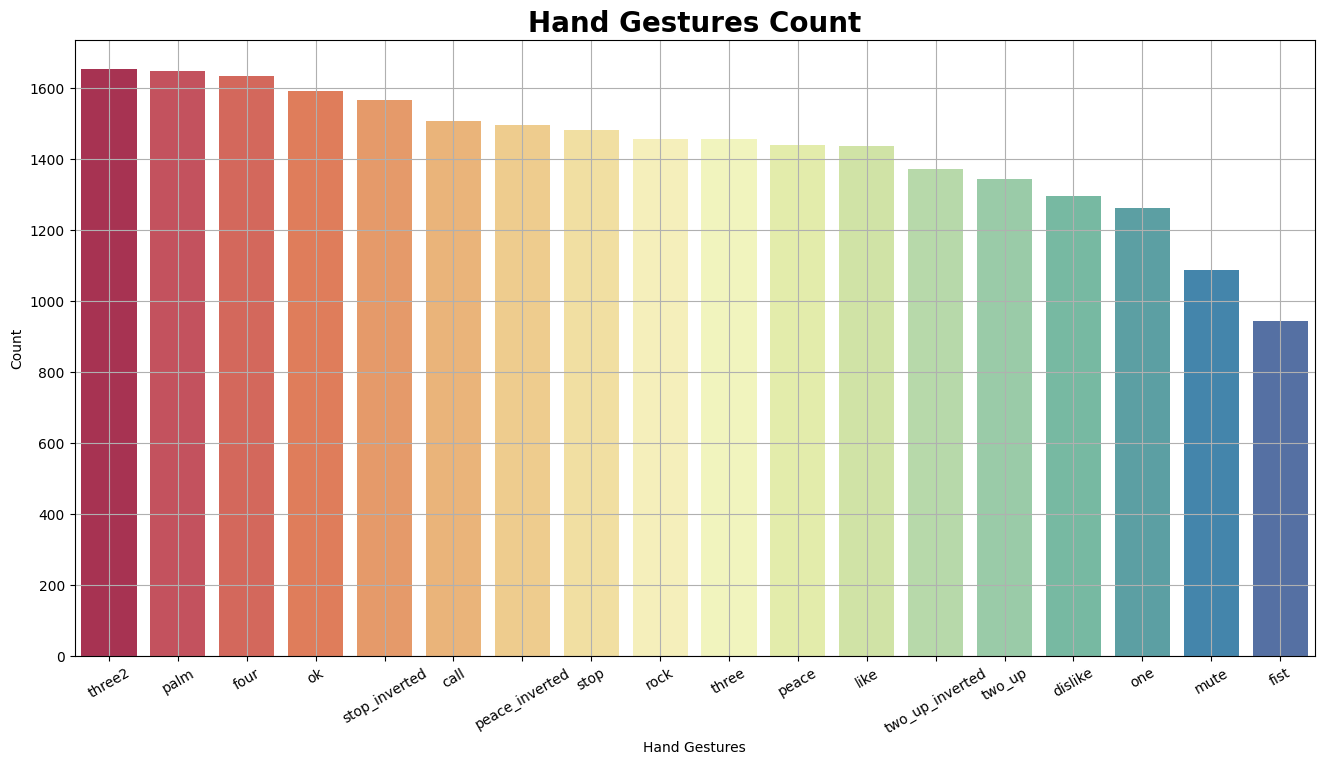

In [9]:
label_order = df['label'].value_counts().index

plt.figure(figsize=(16, 8))
sns.countplot(data=df, x='label', order=label_order, palette='Spectral')
plt.title('Hand Gestures Count', fontsize=20, fontweight='bold')
plt.xlabel('Hand Gestures')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.grid()
plt.show()

In [10]:
def plot_hand_gestures(df):

    # Get unique hand gestures
    unique_hand_gestures = df.drop_duplicates(subset="label", keep="first")

    # Define hand landmark connections
    connections = [
        (0, 1), (1, 2), (2, 3), (3, 4),  # Thumb
        (0, 5), (5, 6), (6, 7), (7, 8),  # Index Finger
        (5, 9), (9, 10), (10, 11), (11, 12),  # Middle Finger
        (9, 13), (13, 14), (14, 15), (15, 16),  # Ring Finger
        (13, 17), (17, 18), (18, 19), (19, 20),  # Pinky
        (0, 17)  # Wrist to pinky
    ]

    # Loop through unique gestures
    for index, gesture in zip(unique_hand_gestures.index, unique_hand_gestures.label.unique()):
        row = df.iloc[index]
        num_points = len(unique_hand_gestures.columns) // 3

        # Extract X and Y coordinates
        x_coords = [row[f"x{i}"] for i in range(1, num_points + 1)]
        y_coords = [-row[f"y{i}"] for i in range(1, num_points + 1)] # Flip y

        # Create a 2D plot
        sns.scatterplot(x=x_coords, y=y_coords, color="red", s=100)

        # Draw connections between landmarks
        for start, end in connections:
            plt.plot([x_coords[start], x_coords[end]],
                     [y_coords[start], y_coords[end]],
                     "green", linewidth=2)

        # Label and show plot
        plt.title(f"Gesture: {gesture}", fontsize=14, fontweight='bold')
        plt.xlabel("X-axis")
        plt.ylabel("Y-axis")
        plt.grid()
        plt.tight_layout()
        plt.show()

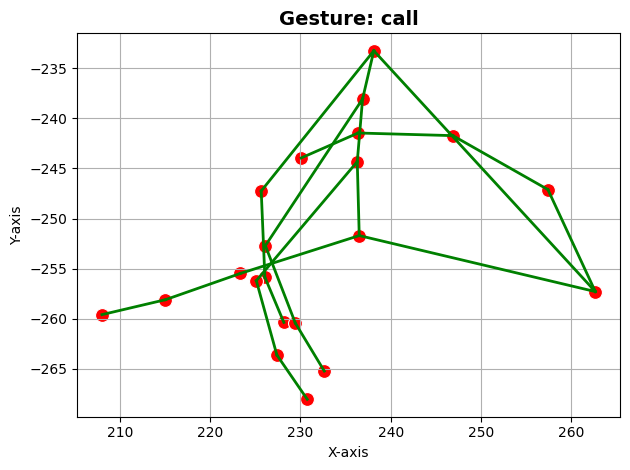

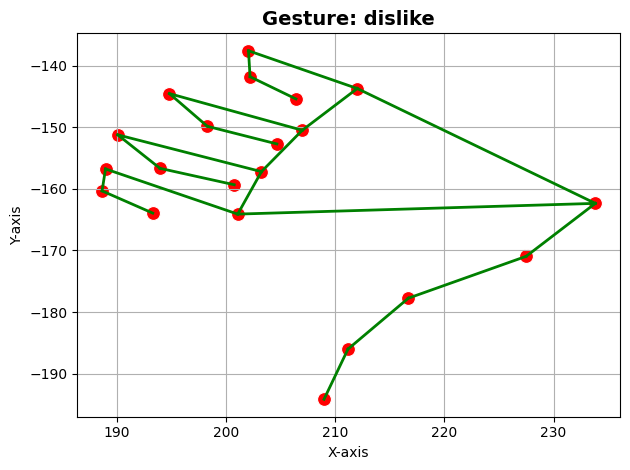

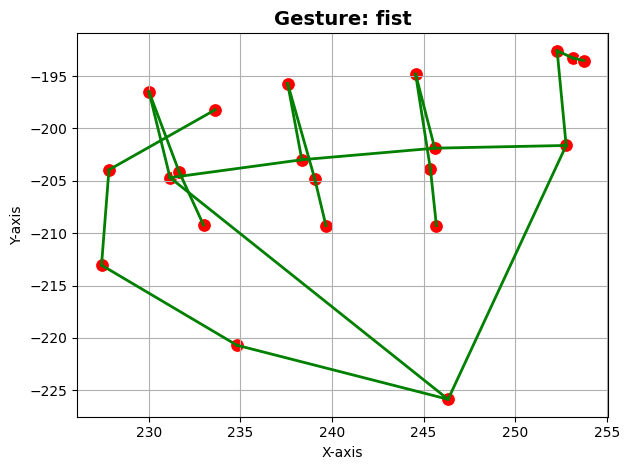

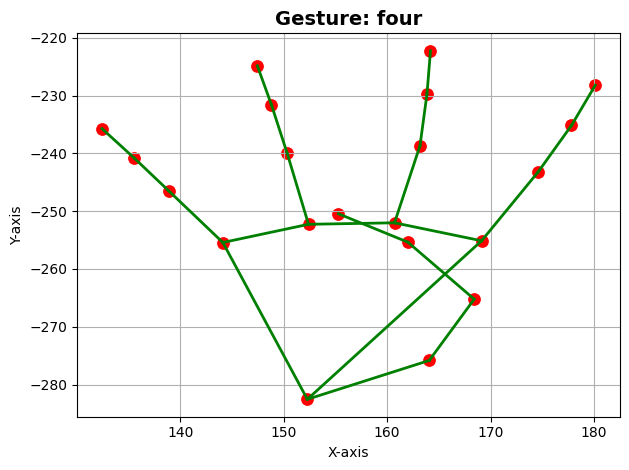

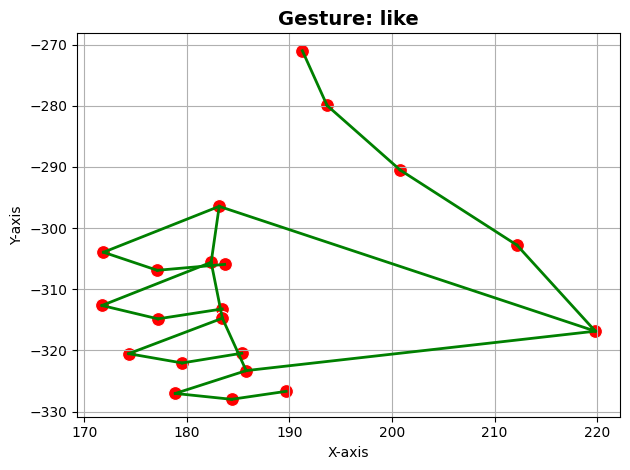

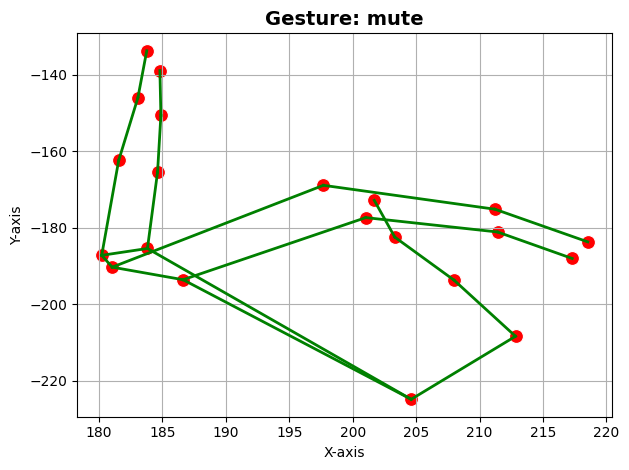

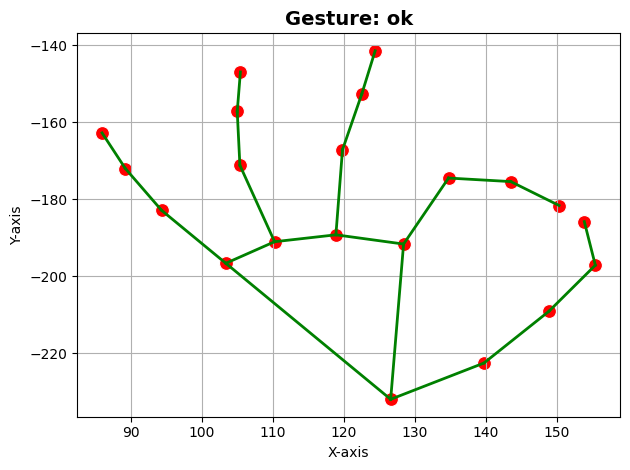

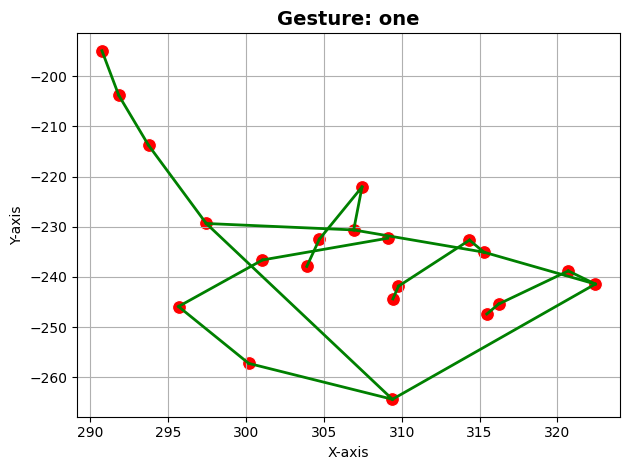

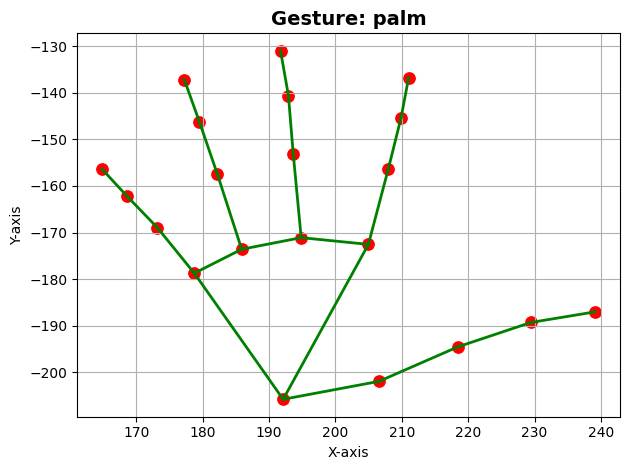

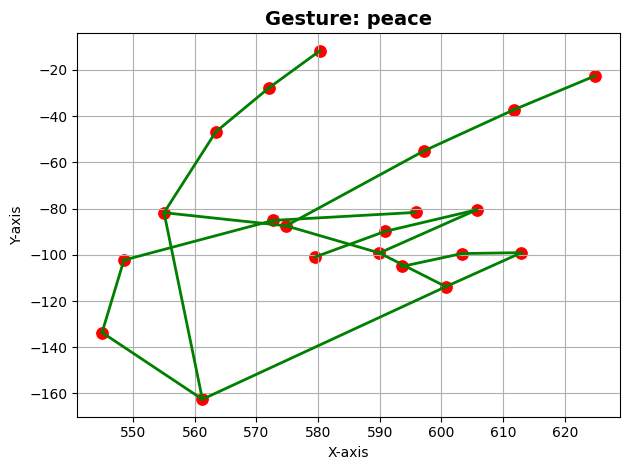

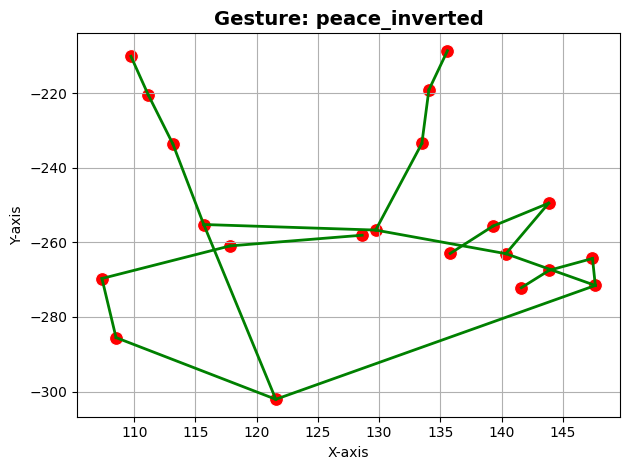

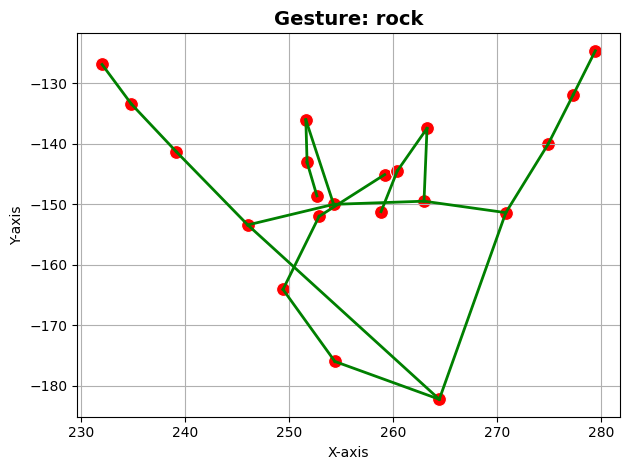

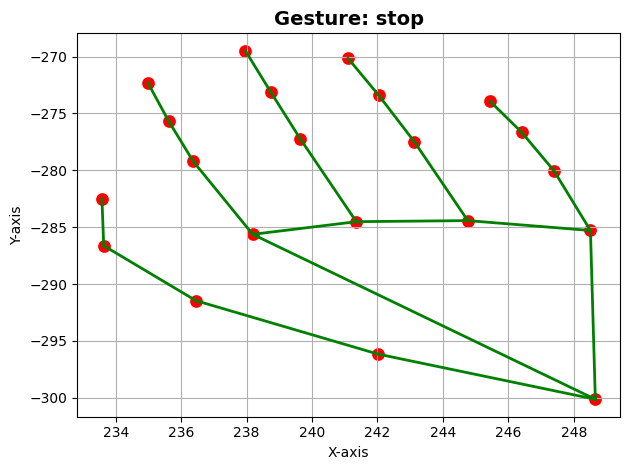

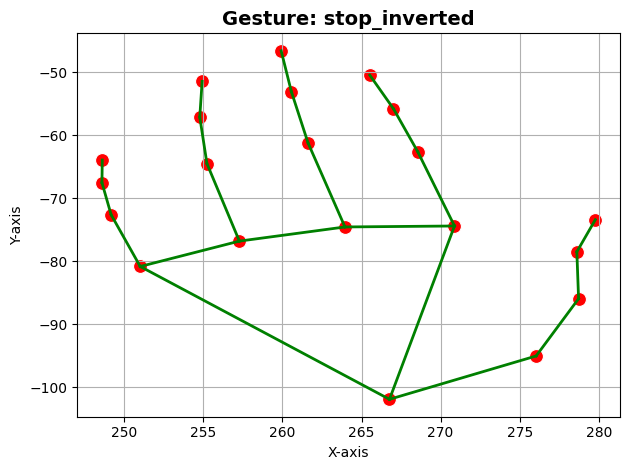

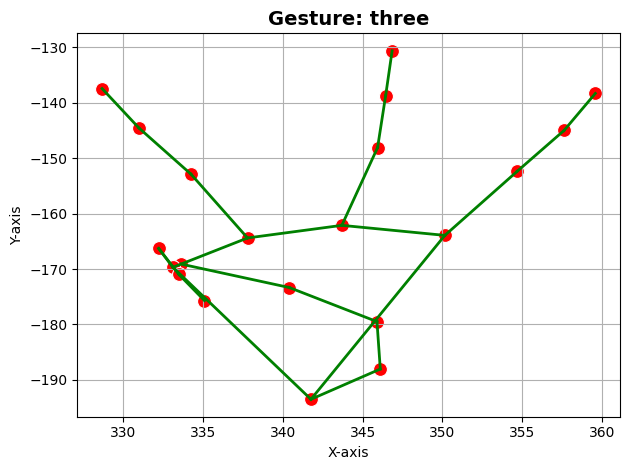

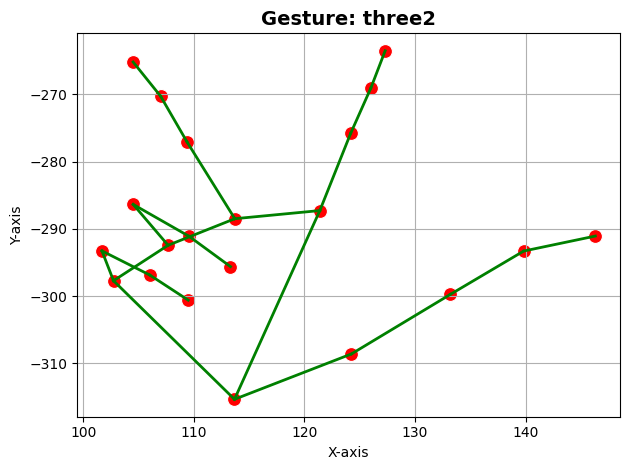

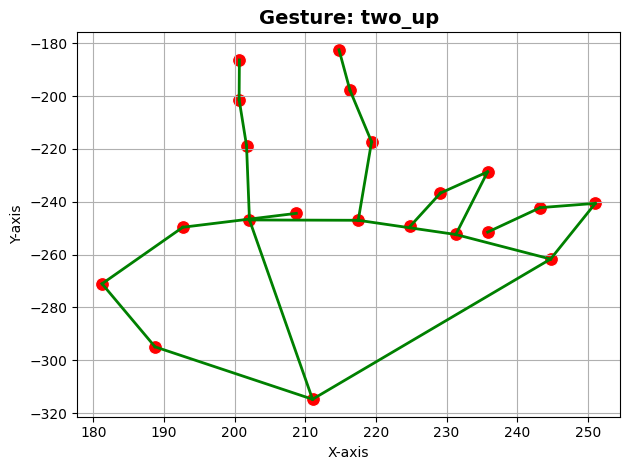

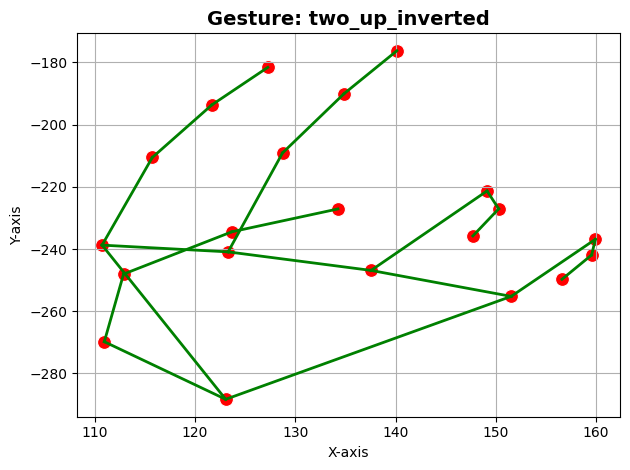

In [11]:
plot_hand_gestures(df)

# Data Preprocessing

In [12]:
features = df.drop('label', axis=1)
labels = df['label']

## Feature Normalization
1. Subtract wrist (X, Y) coordinate from all other (X, Y) coordinates to make the wrist point the origin point.
2. Divide all (X, Y) coordinates by middle finger tip point (X, Y).

In [13]:
def feature_normalization(data):

    data_normalized = data.copy()

    # Extract wrist and mid-finger tip (X, Y) coordinates
    wrist_x = data['x1']
    wrist_y = data['y1']
    mid_finger_tip_x = data['x13']
    mid_finger_tip_y = data['y13']
    new_mid_finger_tip_x = mid_finger_tip_x - wrist_x
    new_mid_finger_tip_y = mid_finger_tip_y - wrist_y

    # Normalize (X, Y) coordinates
    for col in features.columns:
        if 'x' in col:
            data_normalized[col] = (data[col] - wrist_x) / (new_mid_finger_tip_x)
        elif 'y' in col:
            data_normalized[col] = (data[col] - wrist_y) / (new_mid_finger_tip_y)
        else:
            data_normalized[col] = data[col]

    return data_normalized

In [14]:
features_preprocessed = feature_normalization(features)
features_preprocessed.head()

,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,x5,y5,z5,x6,y6,z6,x7,y7,z7,x8,y8,z8,x9,y9,z9,x10,y10,z10,x11,y11,z11,x12,y12,z12,x13,y13,z13,x14,y14,z14,x15,y15,z15,x16,y16,z16,x17,y17,z17,x18,y18,z18,x19,y19,z19,x20,y20,z20,x21,y21,z21
0,-0.0,0.0,-3.649205e-07,0.174914,-1.283455,0.004224,0.525732,-1.962230,0.005798,0.875346,-1.995325,0.005872,1.085408,-1.681429,0.005236,0.817215,-3.030026,0.000154,1.232730,-1.265813,-0.003813,1.219272,-0.181083,-0.006753,1.149240,0.387617,-0.007799,0.858764,-2.423516,-0.004955,1.217394,-0.578072,-0.010097,1.106887,0.396042,-0.014108,1.0,1.0,-0.016854,0.878393,-1.634837,-0.009528,1.250764,-0.137297,-0.016194,1.174874,0.798614,-0.020701,1.062838,1.355052,-0.023142,0.871084,-0.704769,-0.013198,1.309580,-0.228373,-0.020450,1.586041,0.101943,-0.024577,1.820383,0.289999,-0.026722
1,0.0,-0.0,-2.345265e-07,-0.046275,1.039684,-0.011102,0.218228,2.051461,-0.021096,0.398617,2.804606,-0.029252,0.360622,3.491629,-0.034743,0.810786,2.255962,-0.022332,1.403477,1.699293,-0.033495,1.202817,1.434747,-0.039811,0.978360,1.490955,-0.044990,0.950635,1.644798,-0.024038,1.398526,1.157476,-0.032438,1.157730,0.965186,-0.033811,1.0,1.0,-0.036610,1.027554,0.941081,-0.026222,1.493576,0.648632,-0.034942,1.311822,0.530675,-0.030081,1.141993,0.559226,-0.027561,1.066866,0.244301,-0.029042,1.592511,0.253414,-0.038175,1.927295,0.191923,-0.037336,2.240547,0.180827,-0.036136
2,0.0,-0.0,-2.417307e-07,0.174701,3.001556,-0.000184,0.442276,5.859238,-0.009687,0.627193,8.205259,-0.020580,0.612662,10.196596,-0.029497,0.893441,5.554344,-0.016897,1.307002,3.585402,-0.023851,1.171247,2.536372,-0.024241,1.003876,2.463221,-0.024215,0.948501,3.670958,-0.025533,1.313430,1.831127,-0.029864,1.156843,0.897031,-0.027649,1.0,1.0,-0.027500,0.965353,1.465056,-0.033584,1.334251,-0.040844,-0.038898,1.186988,-0.808439,-0.033344,1.026592,-0.684301,-0.030234,0.960252,-0.857172,-0.041256,1.418364,-1.340955,-0.044068,1.693313,-1.769438,-0.040469,1.932900,-1.928990,-0.038301
3,0.0,-0.0,-1.233261e-07,-0.023670,0.881455,-0.002824,0.083031,1.716993,-0.008911,0.135474,2.371993,-0.015029,0.089532,2.922393,-0.019514,0.740320,1.843084,-0.010413,1.233462,1.711348,-0.016497,1.071477,1.504316,-0.020082,0.845216,1.467638,-0.023151,0.899690,1.321246,-0.014133,1.339861,1.249073,-0.018309,1.178491,1.107000,-0.019228,1.0,1.0,-0.021387,0.993811,0.762550,-0.017837,1.416400,0.763658,-0.021707,1.282369,0.659961,-0.018406,1.103796,0.573556,-0.017291,1.025878,0.203049,-0.021804,1.511558,0.178513,-0.027622,1.804565,0.150196,-0.027863,2.051525,0.163246,-0.027723
4,0.0,-0.0,-1.622995e-07,-0.011791,0.833076,-0.002884,0.136985,1.856973,-0.008115,0.161465,2.601936,-0.013397,-0.023882,3.103302,-0.017483,0.603026,1.868095,-0.013008,1.314807,1.773450,-0.019843,1.157663,1.469190,-0.022405,0.921136,1.396277,-0.024263,0.753964,1.396389,-0.016029,1.390668,1.300757,-0.021682,1.221347,1.049145,-0.022350,1.0,1.0,-0.023731,0.903942,0.891667,-0.018826,1.495506,0.848260,-0.023907,1.326056,0.653545,-0.020978,1.086220,0.618153,-0.019323,1.044733,0.388999,-0.021623,1.628780,0.572171,-0.025113,1.978393,0.667633,-0.024087,2.268730,0.801052,-0.023486


## Label Encoding

In [15]:
encoder = LabelEncoder()
encoder.fit(labels)
encoded_labels = encoder.transform(labels)
np.unique(encoded_labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17])

In [16]:
joblib.dump(encoder, 'encoder.pkl')

['encoder.pkl']

## Split dataset

In [17]:
X_train, X_val, y_train, y_val = train_test_split(features_preprocessed,
                                                  encoded_labels,
                                                  test_size=0.2,
                                                  stratify=encoded_labels,
                                                  random_state=42,
                                                  shuffle=True)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((20540, 63), (5135, 63), (20540,), (5135,))

# Model Training
Models picked:
1. SVM
2. Random Forest
3. XGBoost

In [18]:
def model_random_search(model, param_grid, X_train, y_train):
    """
    Performs random search to find the best combination of hyperparameters
    """

    random_search = RandomizedSearchCV(estimator=model,
                                       param_distributions=param_grid,
                                       n_iter=20,
                                       cv=5,
                                       n_jobs=-1,
                                       refit=True)

    random_search.fit(X_train, y_train)
    print(f'Best Parameters: {random_search.best_params_}')

    return random_search.best_estimator_

In [19]:
def print_evaluation(model, X_train, y_train, y_val, y_pred):
    """
    Evaluates the model and prints the accuracy, F1 score, precision, recall and score
    """
    print(f'Accuracy: {accuracy_score(y_val, y_pred):.4f}')
    print(f'F1 Score: {f1_score(y_val, y_pred, average="weighted"):.4f}')
    print(f'Precision: {precision_score(y_val, y_pred, average="weighted"):.4f}')
    print(f'Recall: {recall_score(y_val, y_pred, average="weighted"):.4f}')
    print(f'Score: {model.score(X_train, y_train):.4f}')

## SVM

In [20]:
svm_model = SVC()
svm_param_grid = {'kernel': ['rbf'],
                  'C': [0.1, 1, 10, 100],
                  'gamma': [0.01, 0.1, 1, 10, 100],
                  'random_state': [42]
                  }

svm_best_model = model_random_search(svm_model, svm_param_grid, X_train, y_train)

Best Parameters: {'random_state': 42, 'kernel': 'rbf', 'gamma': 0.01, 'C': 100}


In [21]:
svm_pred = svm_best_model.predict(X_val)
print_evaluation(svm_best_model, X_train, y_train, y_val, svm_pred)

Accuracy: 0.9455
F1 Score: 0.9484
Precision: 0.9558
Recall: 0.9455
Score: 0.9926


In [22]:
joblib.dump(svm_best_model, 'svm_model.pkl')

['svm_model.pkl']

## Random Forest

In [23]:
rf_model = RandomForestClassifier()
rf_param_grid = {'n_estimators': [100, 150, 200],
                 'min_samples_split': [2, 3, 4],
                 'min_samples_leaf': [1, 2, 4],
                 'max_features': ['sqrt', 'log2'],
                 'random_state': [42]
                 }

rf_best_model = model_random_search(rf_model, rf_param_grid, X_train, y_train)

Best Parameters: {'random_state': 42, 'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [24]:
rf_pred = rf_best_model.predict(X_val)
print_evaluation(rf_best_model, X_train, y_train, y_val, rf_pred)

Accuracy: 0.9671
F1 Score: 0.9671
Precision: 0.9674
Recall: 0.9671
Score: 1.0000


In [25]:
joblib.dump(rf_best_model, 'rf_model.pkl')

['rf_model.pkl']

## XGBoost

In [26]:
xgb_model = XGBClassifier()
xgb_param_grid = {'max_depth': [5, 6, 7],
                  'n_estimators': [100, 150, 200],
                  'learning_rate': [0.01, 0.1, 0.2],
                  'subsample': [0.8, 0.9, 1.0],
                  'colsample_bytree': [0.8, 0.9, 1.0],
                  'random_state': [42]
                  }

xgb_best_model = model_random_search(xgb_model, xgb_param_grid, X_train, y_train)

Best Parameters: {'subsample': 1.0, 'random_state': 42, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [27]:
xgb_pred = xgb_best_model.predict(X_val)
print_evaluation(xgb_best_model, X_train, y_train, y_val, xgb_pred)

Accuracy: 0.9762
F1 Score: 0.9763
Precision: 0.9764
Recall: 0.9762
Score: 1.0000


In [28]:
joblib.dump(xgb_best_model, 'xgb_model.pkl')

['xgb_model.pkl']

# Evaluation

## Model Evaluation

In [29]:
def models_evaluation(model, X_train, y_train, y_val, y_pred):
    """
    Returns a dictionary of evaluation metrics
    """

    evaluation = {}

    evaluation['Accuracy'] = np.round(accuracy_score(y_val, y_pred), 4)
    evaluation['F1 Score'] = np.round(f1_score(y_val, y_pred, average='weighted'), 4)
    evaluation['Precision'] = np.round(precision_score(y_val, y_pred, average='weighted'), 4)
    evaluation['Recall'] = np.round(recall_score(y_val, y_pred, average='weighted'), 4)
    evaluation['Score'] = np.round(model.score(X_train, y_train), 4)

    return evaluation

In [30]:
evaluation_dict = {}
model_names = ['SVM', 'Random Forest', 'XGBoost']
models = [svm_best_model, rf_best_model, xgb_best_model]
predictions = [svm_pred, rf_pred, xgb_pred]

for model, model_name, y_pred in zip(models, model_names, predictions):
    evaluation_dict[model_name] = models_evaluation(model, X_train, y_train, y_val, y_pred)

evaluation_df = pd.DataFrame(evaluation_dict)
evaluation_df

,SVM,Random Forest,XGBoost
Accuracy,0.9455,0.9671,0.9762
F1 Score,0.9484,0.9671,0.9763
Precision,0.9558,0.9674,0.9764
Recall,0.9455,0.9671,0.9762
Score,0.9926,1.0000,1.0000


In [31]:
evaluation_df.to_csv('models_evaluation.csv')

## Classification Report

In [32]:
def model_classification_report(model_name, y_val, y_pred):

    print(f'Classification Report of {model_name}\n')
    print(classification_report(y_val, y_pred, target_names=labels.unique()))

In [33]:
model_classification_report('SVM', y_val, svm_pred)

Classification Report of SVM

                 precision    recall  f1-score   support

           call       0.99      0.94      0.96       301
        dislike       0.98      0.95      0.96       259
           fist       0.99      0.98      0.99       189
           four       0.98      0.94      0.96       327
           like       0.97      0.94      0.96       287
           mute       0.96      0.98      0.97       217
             ok       1.00      0.97      0.98       318
            one       0.96      0.90      0.93       253
           palm       0.96      0.95      0.96       330
          peace       0.97      0.93      0.95       288
 peace_inverted       0.99      0.97      0.98       299
           rock       1.00      0.97      0.98       292
           stop       0.93      0.93      0.93       296
  stop_inverted       0.64      0.96      0.77       314
          three       0.98      0.92      0.95       291
         three2       1.00      0.96      0.98       331


In [34]:
model_classification_report('Random Forest', y_val, rf_pred)

Classification Report of Random Forest

                 precision    recall  f1-score   support

           call       0.99      0.98      0.99       301
        dislike       0.97      0.98      0.97       259
           fist       1.00      0.99      0.99       189
           four       0.97      0.96      0.96       327
           like       0.97      0.97      0.97       287
           mute       0.95      0.98      0.97       217
             ok       0.99      0.99      0.99       318
            one       0.95      0.96      0.95       253
           palm       0.93      0.95      0.94       330
          peace       0.95      0.93      0.94       288
 peace_inverted       0.99      0.96      0.97       299
           rock       1.00      0.98      0.99       292
           stop       0.92      0.95      0.93       296
  stop_inverted       0.98      0.99      0.98       314
          three       0.99      0.97      0.98       291
         three2       0.97      0.98      0.98 

In [35]:
model_classification_report('XGBoost', y_val, xgb_pred)

Classification Report of XGBoost

                 precision    recall  f1-score   support

           call       0.99      0.99      0.99       301
        dislike       0.99      0.98      0.99       259
           fist       1.00      0.99      1.00       189
           four       0.98      0.98      0.98       327
           like       0.98      0.99      0.98       287
           mute       0.95      0.97      0.96       217
             ok       0.99      0.99      0.99       318
            one       0.96      0.96      0.96       253
           palm       0.95      0.96      0.95       330
          peace       0.97      0.95      0.96       288
 peace_inverted       0.99      0.98      0.98       299
           rock       1.00      0.99      0.99       292
           stop       0.93      0.95      0.94       296
  stop_inverted       0.98      0.99      0.99       314
          three       0.99      0.97      0.98       291
         three2       0.99      0.99      0.99       

## Confusion Matrix

In [36]:
def model_confusion_matrix(model_name, y_val, y_pred):

    cm = confusion_matrix(y_val, y_pred)
    text_labels = encoder.inverse_transform(np.unique(y_val))

    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=text_labels, yticklabels=text_labels)
    plt.title(f'Confusion Matrix of {model_name}', fontsize=15, fontweight='bold')
    plt.xlabel('Predicted', fontsize=15, fontweight='bold')
    plt.ylabel('Actual', fontsize=15, fontweight='bold')
    plt.show()

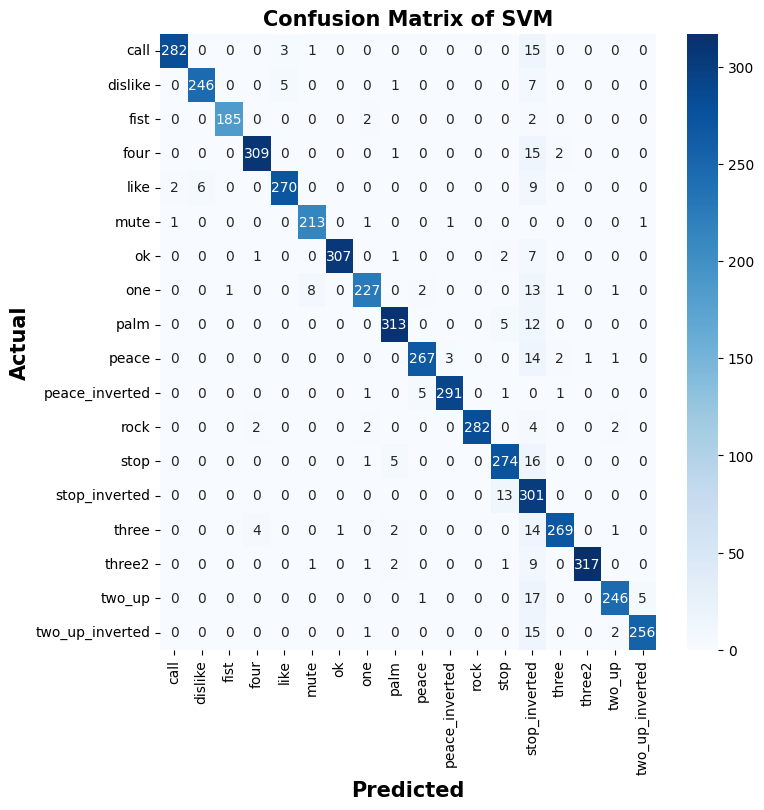

In [37]:
model_confusion_matrix('SVM', y_val, svm_pred)

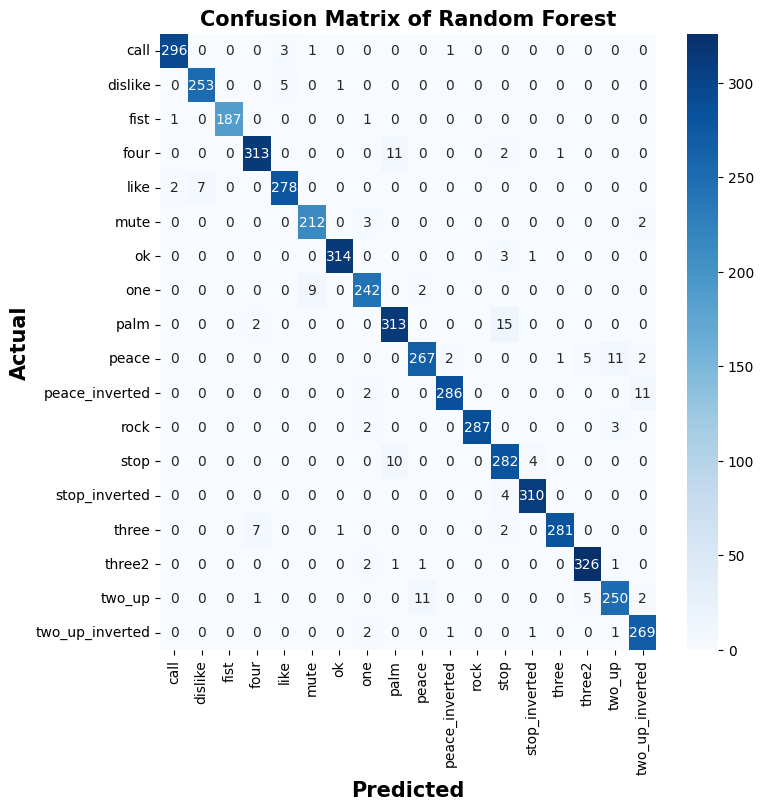

In [38]:
model_confusion_matrix('Random Forest', y_val, rf_pred)

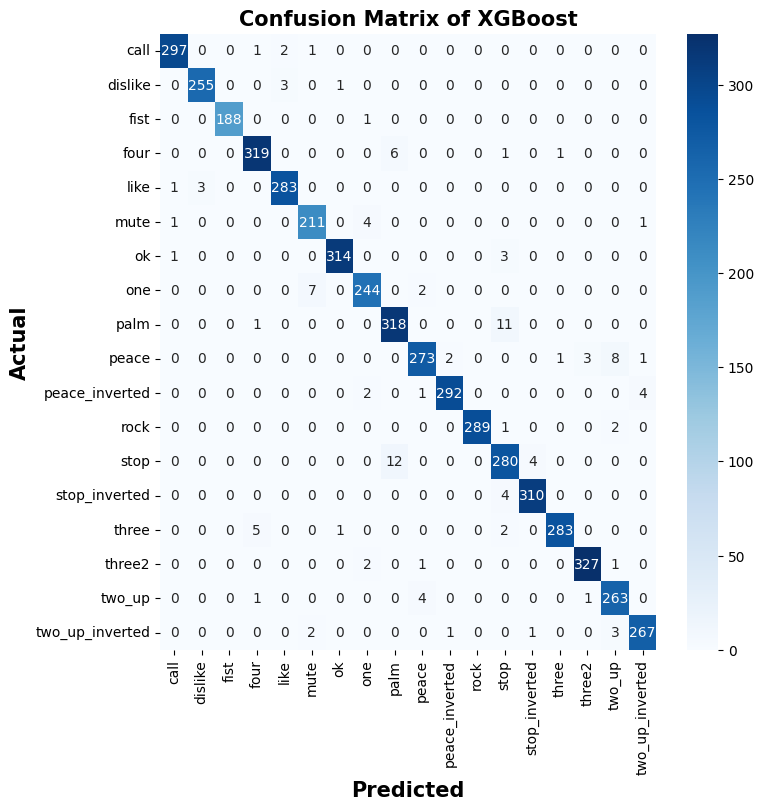

In [39]:
model_confusion_matrix('XGBoost', y_val, xgb_pred)

# Conclusion


## Results Summary
Models ranking based on performance:
1. XGBoost
2. Random Forest
3. SVM


---


Both **Random Forest** and **XGBoost** models slightly struggle with differentiaiting between very similar gestures:

| Prediction         | Actual           |
|--------------------|------------------|
| dislike            | like             |
| like               | dislike          |
| four               | three            |
| mute               | one              |
| palm               | stop             |
| palm               | four             |
| stop               | palm             |
| stop_inverted      | stop             |
| peace              | two_up           |
| two_up             | peace            |
| two_up_inverted    | peace_inverted   |

**SVM** has similar struggles to **Random Forest** and **XGBoost**. Additionally **SVM** has a tendency to predict stop_inverted for most hand gestures.

## Best Model
Best model for classification is **XGBoost**